In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from skimage.segmentation import inverse_gaussian_gradient, chan_vase, watershed, clear_border
import skimage.segmentation

affseg = np.load('kitchen2_mask.npy')

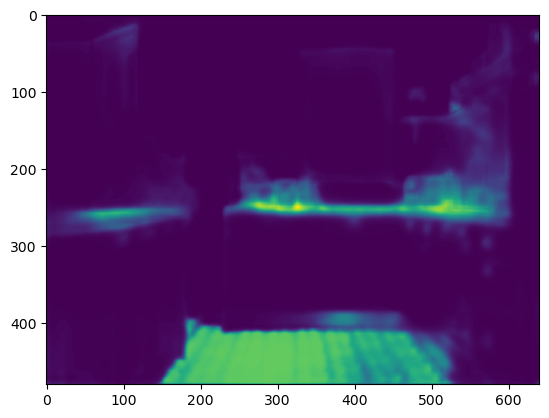

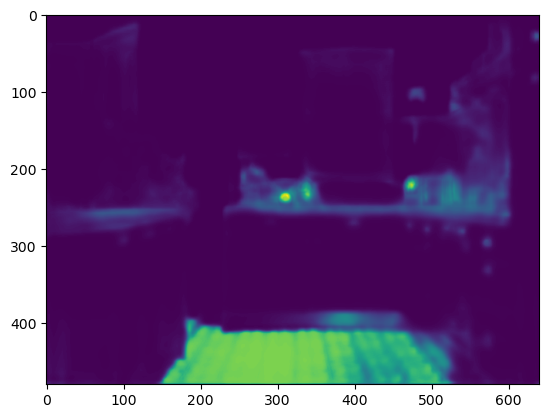

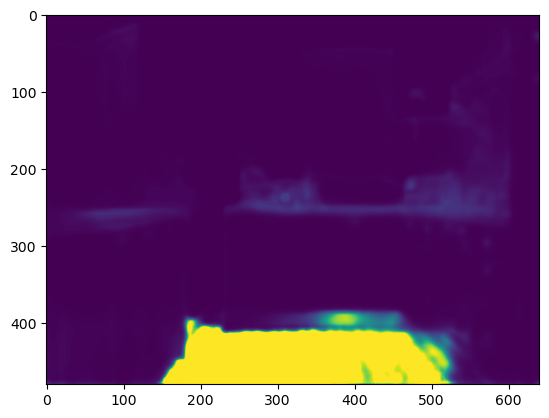

In [2]:
affseg.shape
viewer0 = plt.figure(1)
plt.imshow(affseg[:,:,0])
viewer1 = plt.figure(2)
plt.imshow(affseg[:,:,1])
viewer2 = plt.figure(3)
plt.imshow(affseg[:,:,2])

plt.show()



In [33]:
affseg_t = cv2.threshold(affseg, 50, 255, cv2.THRESH_BINARY)[1]

In [53]:
affseg_img = np.zeros_like(affseg_t[:,:,0])
for i in range(0, 3):
    affseg_img = cv2.bitwise_or(affseg_img, affseg_t[:, :, i])
print(affseg_t.shape[-1])

3


In [47]:
# promising solutions seem to be:
# inverse gaussian gradient,
# chan vese, super slow tho
# watershed, nop
# maybe clear border?
import time

start = time.time()
inverse_gaussian = skimage.segmentation.inverse_gaussian_gradient(affseg_img)
end1 = time.time() - start
#chan_vese = skimage.segmentation.chan_vese(affseg_t[:,:,0])
sobel = skimage.filters.sobel(affseg_img)
end_s = time.time() - end1

0.025387048721313477
1630921642.2545054
1630918457.1269948
0.06147408485412598


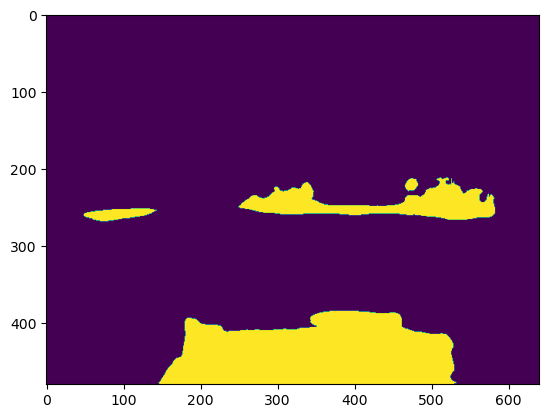

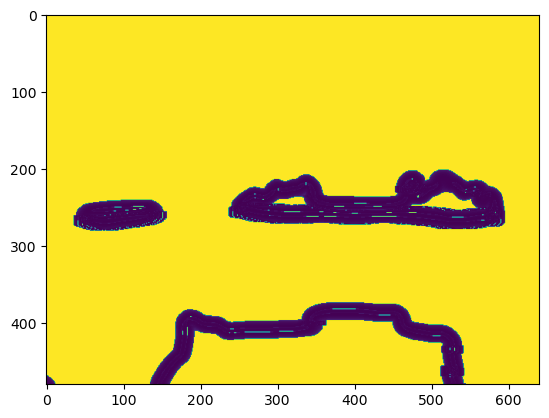

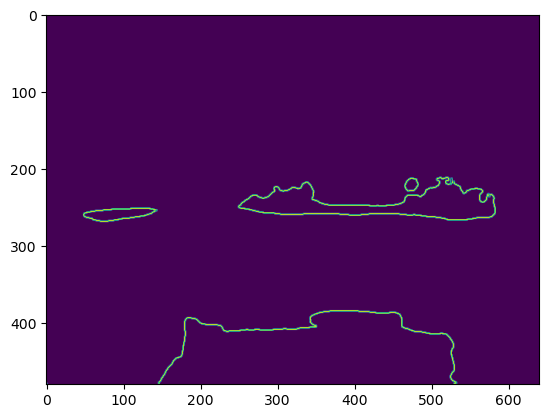

In [48]:
print(end1)
print(end_s)
print(end2)
print(end3)

og = plt.figure(1)
plt.imshow(affseg_img)
ig = plt.figure(2)
plt.imshow(inverse_gaussian)
cv = plt.figure(3)
plt.imshow(sobel)

plt.show()

4


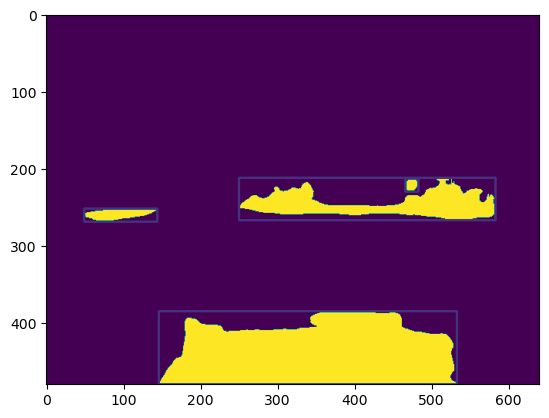

In [52]:
cnts = cv2.findContours(affseg_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
ROI_number = 0
image = affseg_img.copy()
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if(w < 15 and h < 15):
        continue
    image = cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    #ROI = original[y:y+h, x:x+w]
    ROI_number += 1

print(ROI_number)
plt.imshow(image)
plt.show()